https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('data/temps.csv')
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [78]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [79]:
df.describe(include='all')

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Tues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.0,6.477011,15.514368,NaN,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,NaN,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,NaN,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,NaN,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,NaN,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,NaN,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000


In [80]:
# valores unicos de la columna week
df.week.unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [81]:
# valores de la columna week
df.week.values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [82]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo... 
# no voy a usar esta forma, asi le asigno a los dias el numero que yo quiero.. 
# Sino a la hora de interpretarlo me sera mas dificil. Lo hago manualmente mas abajo
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(df['week'])
# df['week'] = le.transform(df['week'])

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [83]:
# pd.get_dummies(df['week'])

In [84]:
def finde(dia):
    if dia in ['Sat', 'Sun']:
        return 1
    else:
        return 0
df['week'].apply(finde)

0      0
1      1
2      1
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    1
Name: week, Length: 348, dtype: int64

PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [85]:
#Reemplaza el valor de la columna week con un diccionario
my_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

df['week'] = df['week'].replace(my_dict)

C:\Users\emita\AppData\Local\Temp\ipykernel_2440\2500110800.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week'] = df['week'].replace(my_dict)


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

Significa combinar valores de una columna en función de alguna categoría o agrupación para calcular una estadística resumen (como una media, suma, máximo, etc.). Esto puede ayudarte a reducir la variabilidad en los datos y descubrir patrones más claros.

In [86]:
months_g = df.groupby('month')[['temp_1']].mean().reset_index()
months_g

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [87]:
df = df.merge(months_g, on='month')

In [88]:
df = df.rename(columns={'actual_y': 'media_mensual', 'actual_x': 'actual'})
df

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,4,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,6,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,0,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,2,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,3,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,4,48,48,45.4,57,44,46,44,42,43.741935


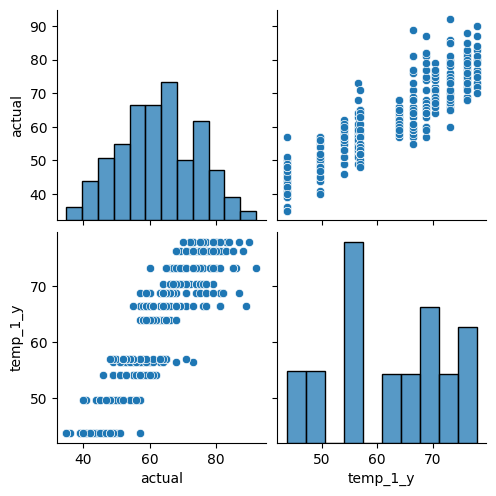

In [89]:
import seaborn as sns
sns.pairplot(df[['actual','temp_1_y']])

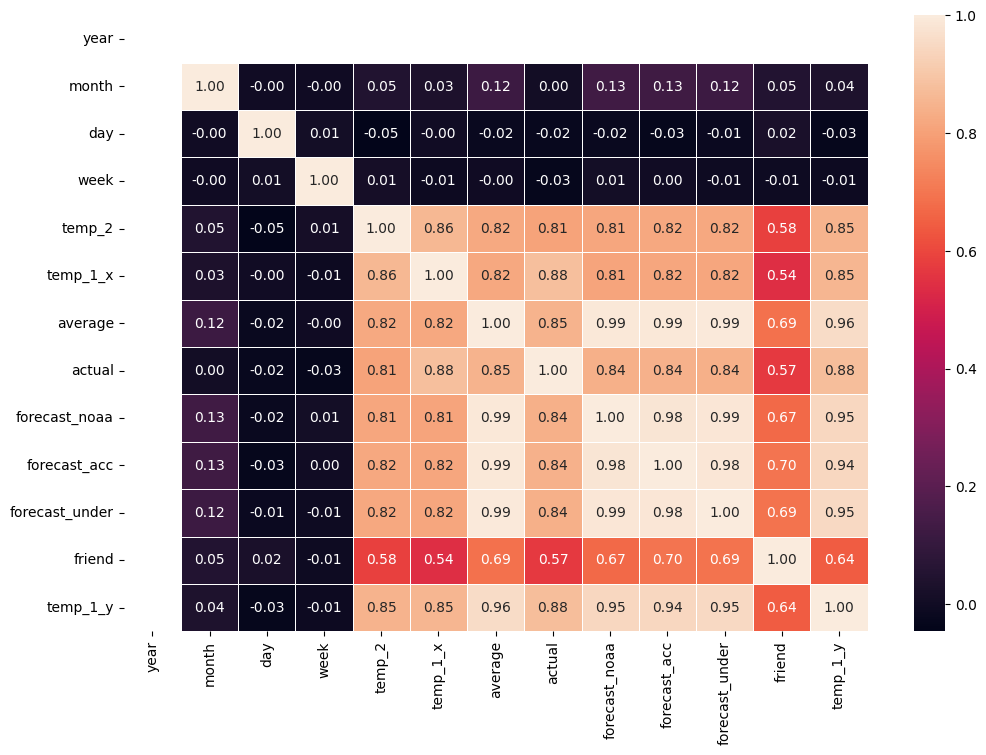

In [90]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))  # Cambia los valores (ancho, alto) según lo que necesites

# Crear el heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.show()

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [91]:
import numpy as np

In [92]:
df = df.drop(['year','day','week'], axis = 1)

In [93]:
df

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935
344,12,42,47,45.3,48,41,49,44,58,43.741935
345,12,47,48,45.3,48,43,50,45,65,43.741935
346,12,48,48,45.4,57,44,46,44,42,43.741935


In [94]:
X = np.array(df.drop(["actual"], axis=1))
y = np.array(df["actual"])

In [95]:
# train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (278, 9)
X_test (70, 9)
y_train (278,)
y_test (70,)


### 4. Entrena el modelo


In [97]:
from sklearn.tree import DecisionTreeRegressor
# el modelo se llama dtr
dtr = DecisionTreeRegressor(random_state=100)

In [98]:
DecisionTreeRegressor??

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Source:        
class DecisionTreeRegressor(RegressorMixin, BaseDecisionTree):
    """A decision tree regressor.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"squared_error", "friedman_mse", "absolute_error", \
            "poisson"}, default="squared_error"
        The function to measure the quality of a split. Supported criteria
        are "squared_error" for the mean squared error, which is equal to
        variance reduction as feature selection criterion and minimizes the L2
        loss using the mean of each terminal node, "friedman_mse", which uses
        mean squared error with Frie

In [99]:
print(df.columns)

Index(['month', 'temp_2', 'temp_1_x', 'average', 'actual', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')


In [100]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [101]:
# muestra la feature importance del modelo 
importances = dtr.feature_importances_
importances

array([0.01684782, 0.02715936, 0.76459635, 0.10197911, 0.01247375,
       0.02944507, 0.02881642, 0.01255554, 0.00612657])

In [102]:
df.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'actual', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [103]:
# Lista de nombres de las características
feature_names = ['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'temp_1_y']

# Importancias de las características desde el modelo
feature_importances = dtr.feature_importances_

In [104]:
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
2,temp_1_x,0.764596
3,average,0.101979
5,forecast_acc,0.029445
6,forecast_under,0.028816
1,temp_2,0.027159
0,month,0.016848
7,friend,0.012556
4,forecast_noaa,0.012474
8,temp_1_y,0.006127


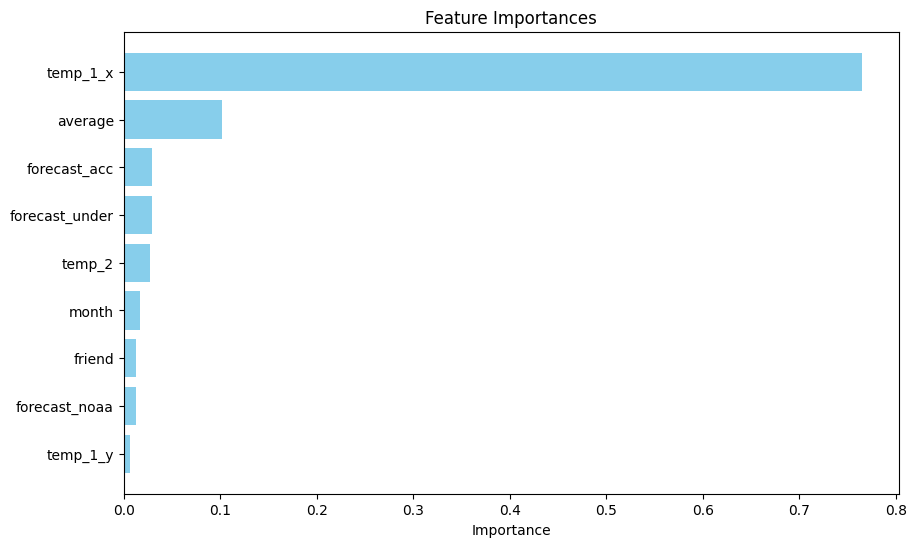

In [105]:
# Gráfica de las importancias
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [106]:
y_pred = dtr.predict(X_test)
y_pred

array([77., 68., 57., 64., 72., 76., 71., 79., 60., 73., 68., 67., 39.,
       60., 74., 55., 58., 56., 57., 79., 61., 57., 70., 55., 63., 49.,
       66., 45., 58., 77., 66., 64., 57., 85., 75., 60., 51., 48., 74.,
       40., 77., 54., 81., 40., 60., 76., 55., 85., 51., 39., 40., 39.,
       63., 64., 71., 57., 55., 61., 60., 53., 60., 46., 71., 71., 59.,
       59., 71., 68., 80., 39.])

In [107]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación (R2):", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación (R2): 0.677965507980804
MAE 5.228571428571429
MAPE 0.08367237354653334
MSE 45.02857142857143
RMSE 6.710333183126709


In [108]:
print("Comparamos con train para tener una idea de si hay overfitting o como vamos...")
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))
print("Vemos que el train esta perfecto, o sea que hay que regularizar: prunning")

Comparamos con train para tener una idea de si hay overfitting o como vamos...
Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0
Vemos que el train esta perfecto, o sea que hay que regularizar: prunning


### 6. Representa el árbol de decision

In [109]:
df.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'actual', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

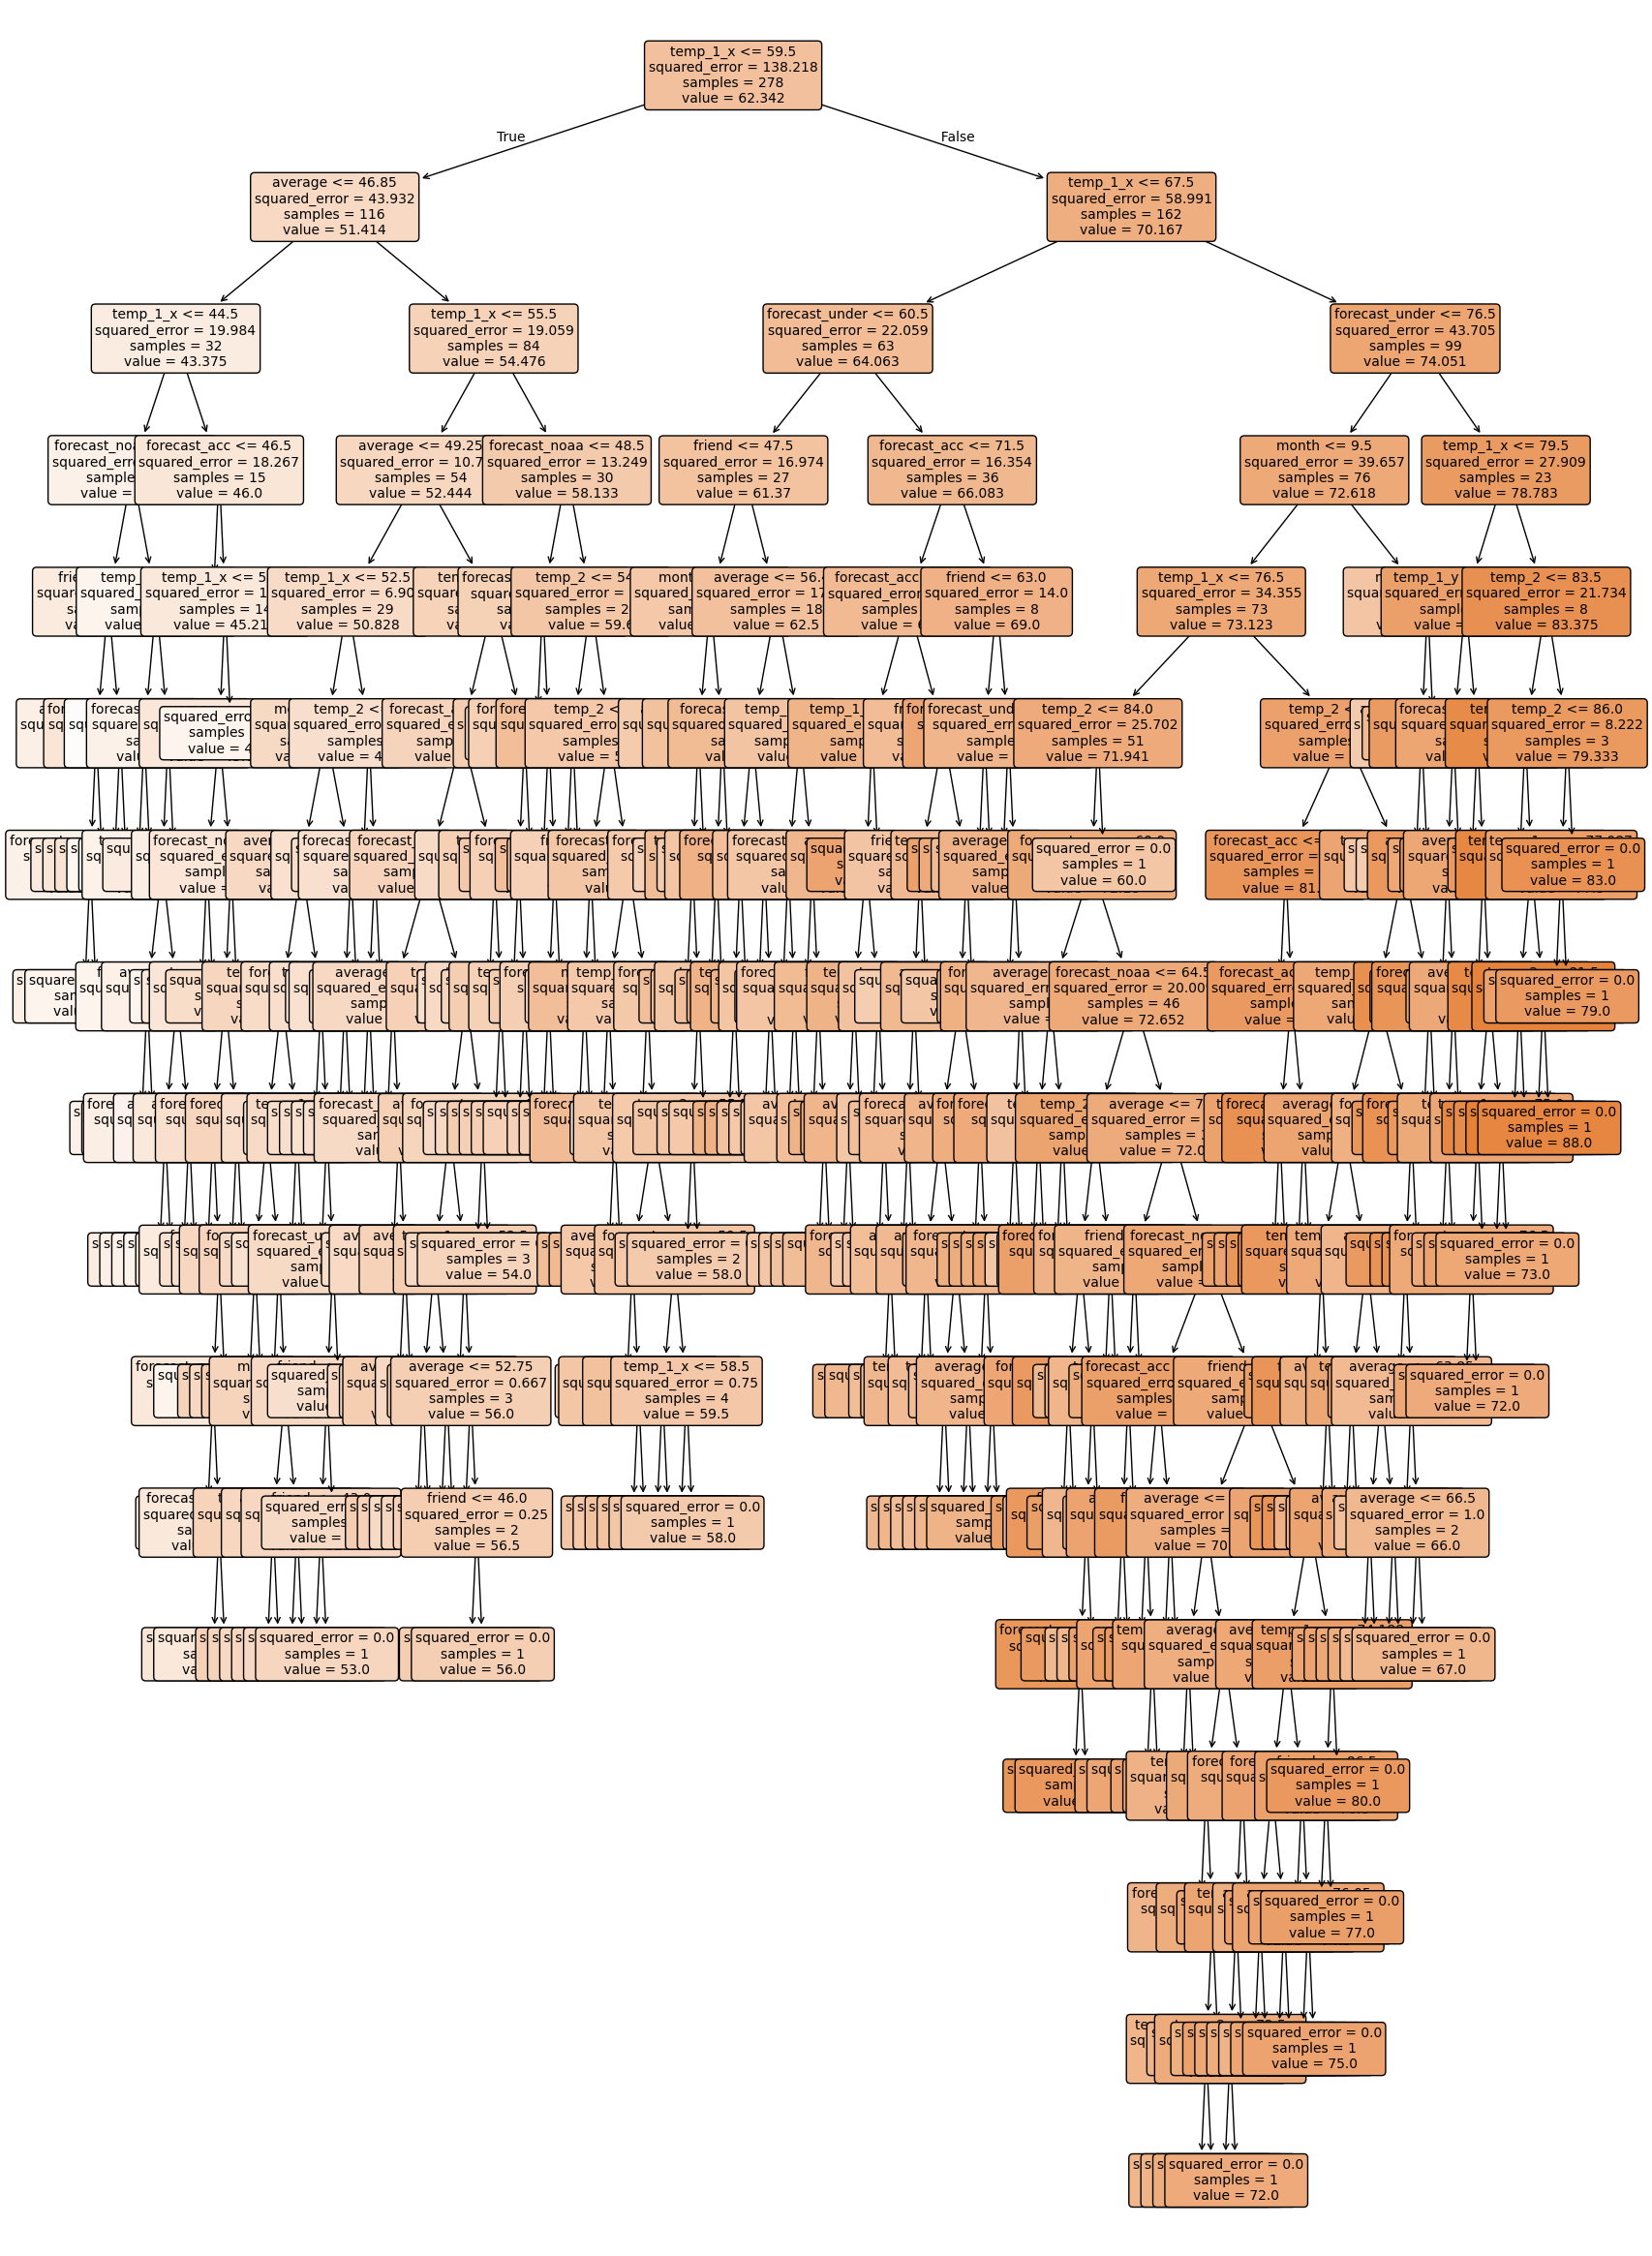

In [110]:
# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización
from sklearn.tree import plot_tree

# Configura el tamaño de la figura
plt.figure(figsize=(20, 30))  # Ajusta los valores para cambiar el tamaño

# Grafica el árbol
plot_tree(dtr, 
          feature_names= ['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
          filled=True,  # Colorea los nodos según los valores de salida
          rounded=True,  # Bordes redondeados para los nodos
          fontsize=10)  # Ajusta el tamaño del texto para que sea legible

# Muestra la gráfica
plt.show()

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [111]:
for md in range(3,10,2):

    dtr3 = DecisionTreeRegressor(max_depth=md)
    dtr3.fit(X, y)
    y_pred3 = dtr3.predict(X_test)
    print("Max depth de MD", md)
    print("Coeficiente determinación", r2_score(y_test, y_pred3))
    print("MAE", mean_absolute_error(y_test, y_pred3))
    print("MAPE", mean_absolute_percentage_error(y_test, y_pred3))
    print("MSE", mean_squared_error(y_test, y_pred3))
    print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred3)))
    print("---------------")

Max depth de MD 3
Coeficiente determinación 0.852612774849209
MAE 3.786136932354919
MAPE 0.0606838404247514
MSE 20.608463875247654
RMSE 4.539654598672421
---------------
Max depth de MD 5
Coeficiente determinación 0.9258770535297521
MAE 2.5772311460302078
MAPE 0.039795509952680296
MSE 10.36426368090031
RMSE 3.219357650355162
---------------
Max depth de MD 7
Coeficiente determinación 0.9614705202463785
MAE 1.532148446791304
MAPE 0.023329880572432966
MSE 5.387396301288826
RMSE 2.3210765392999915
---------------
Max depth de MD 9
Coeficiente determinación 0.9789304557020632
MAE 0.7934183673469387
MAPE 0.011815831202204558
MSE 2.9460554813195117
RMSE 1.7164077258389137
---------------


### 8. Vuelve a evaluar tu modelo

In [112]:
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [113]:
y_pred3 = dtr3.predict(X_test)
y_pred3
print("Coeficiente determinación", r2_score(y_test, y_pred3))
print("MAE", mean_absolute_error(y_test, y_pred3))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred3))
print("MSE", mean_squared_error(y_test, y_pred3))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred3)))

Coeficiente determinación 0.852612774849209
MAE 3.786136932354919
MAPE 0.0606838404247514
MSE 20.608463875247654
RMSE 4.539654598672421


### 9. Vuelve a representar su árbol

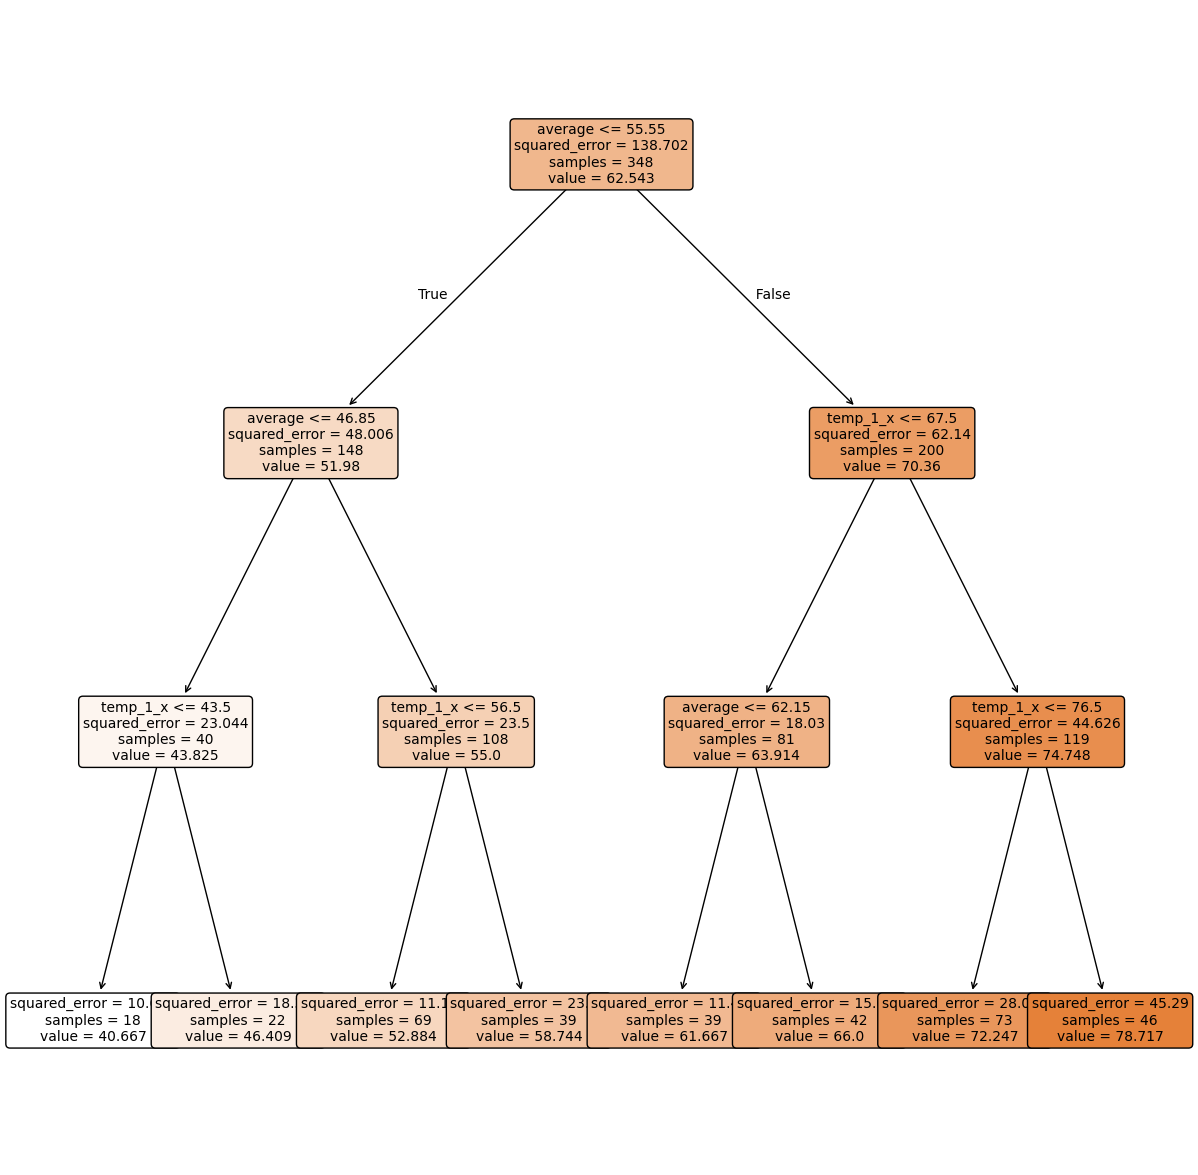

In [114]:
plt.figure(figsize=(15,15))

# Grafica el árbol
plot_tree(dtr3, 
          feature_names= ['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
          filled=True,  # Colorea los nodos según los valores de salida
          rounded=True,  # Bordes redondeados para los nodos
          fontsize=10)  # Ajusta el tamaño del texto para que sea legible

# Muestra la gráfica
plt.show()

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [115]:
feature_importances3 = dtr3.feature_importances_
feature_importances3

array([0.        , 0.        , 0.19667863, 0.80332137, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [116]:
importances_df3 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances3
}).sort_values(by='Importance', ascending=False)

importances_df3

,Feature,Importance
3,average,0.803321
2,temp_1_x,0.196679
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
6,forecast_under,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


FIJAOS QUE SOLO USA 3 COLUMNAS...

In [117]:
x_valioso = np.array(df[['average', 'temp_1_x']])

In [118]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']

X_train, X_test, y_train, y_test = train_test_split(x_valioso, y, test_size = 0.2)

In [119]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [120]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación -1.0819893329318222
MAE 13.971428571428572
MAPE 0.23737307762163604
MSE 293.48571428571427
RMSE 17.13142475936296


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [121]:
df['target_clas'] = np.where(df['actual']>59,1,0)
df[['actual','target_clas']]

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0
...,...,...
343,47,0
344,48,0
345,48,0
346,57,0


<Axes: >

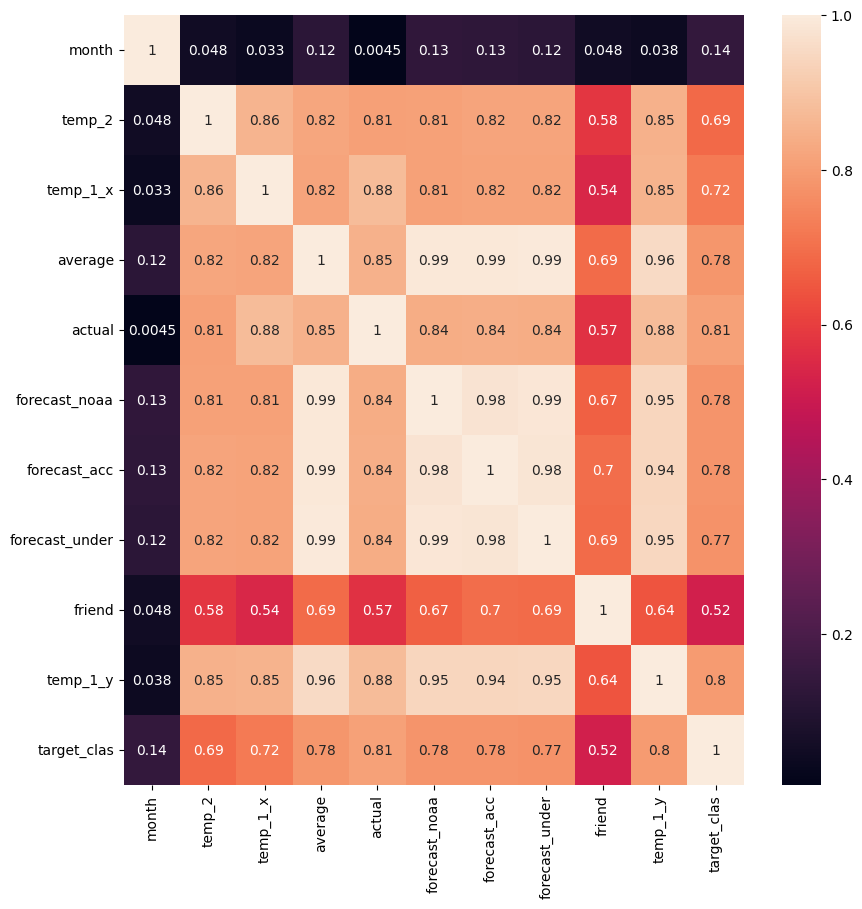

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [123]:
df['target_clas'].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [124]:
df.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'actual', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y', 'target_clas'],
      dtype='object')

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['actual','target_clas'], axis=1), 
    df['target_clas'], 
    test_size=0.2, 
    random_state=42)

In [126]:
# ENRTRENA UN MODELO DE CLASIFICACION LLAMADO dtc
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [127]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [128]:
# Lista de nombres de las características
feature_names = ['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'temp_1_y']

# Importancias de las características desde el modelo
feature_importances = dtc.feature_importances_
feature_importances

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 , 0.        ])

In [129]:
y_pred4 = dtc.predict(X_test)
y_pred4

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0])

In [130]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud comparando las predicciones con los valores reales
accuracy = accuracy_score(y_test, y_pred4)

# Mostrar el resultado
print(f"Accuracy del modelo en test: {accuracy:.2f}")

Accuracy del modelo en test: 0.91


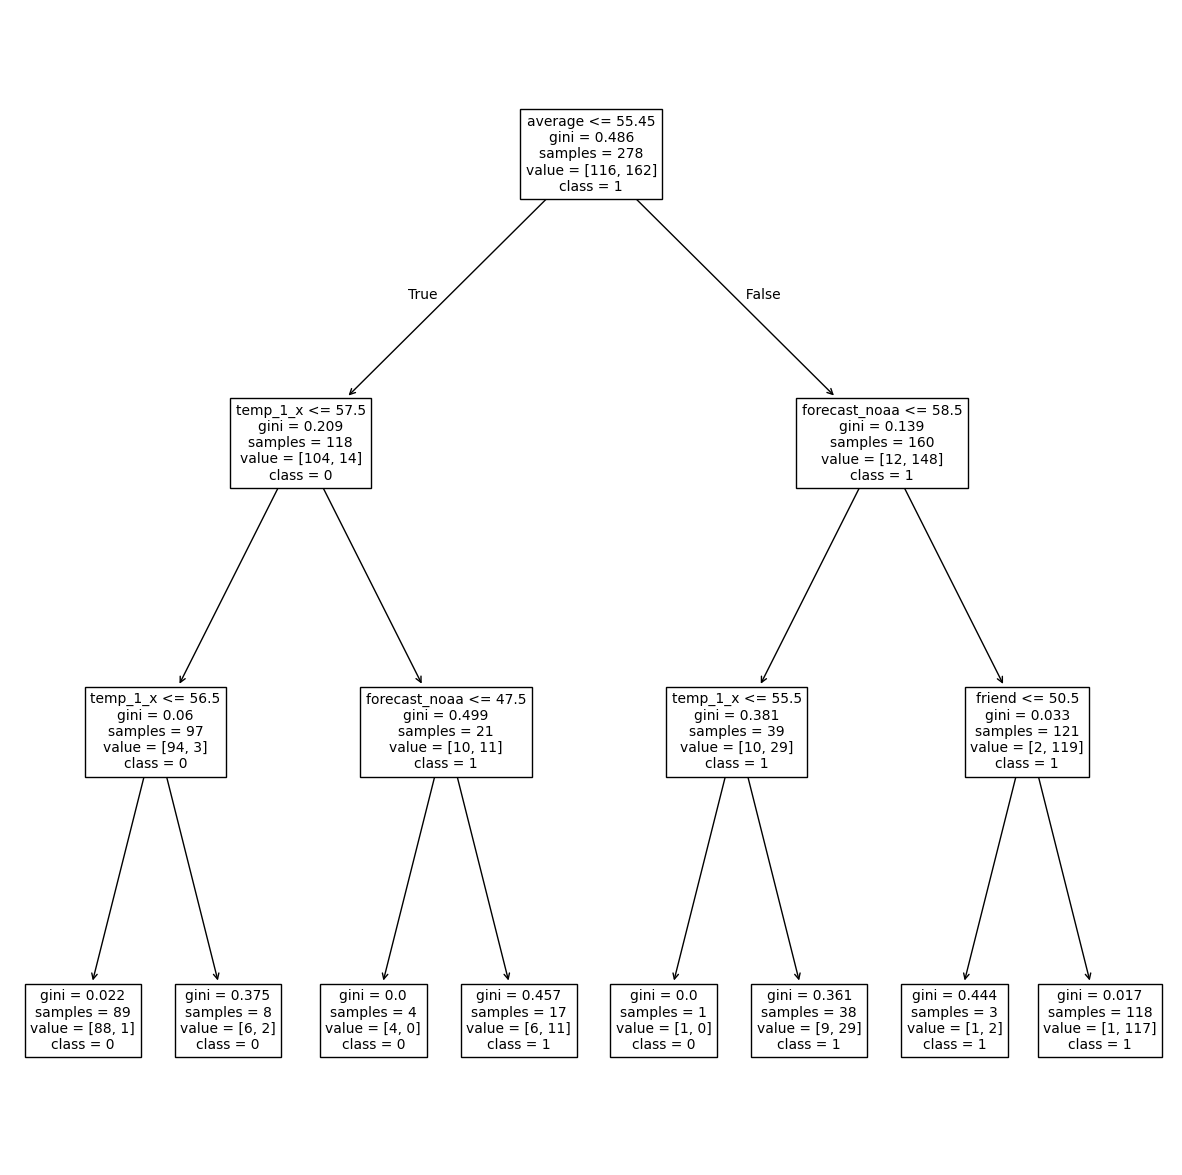

In [131]:
class_names = [str(cls) for cls in dtc.classes_]

plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = feature_names, class_names = class_names, fontsize=10); #max_depth cambia la profundidad de la visualización

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [132]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\emita\.conda\envs\data_analisis_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr_accuracy:', lr_accuracy)
print('dtc_accuracy:', accuracy)

lr_accuracy: 0.8571428571428571
dtc_accuracy: 0.9142857142857143


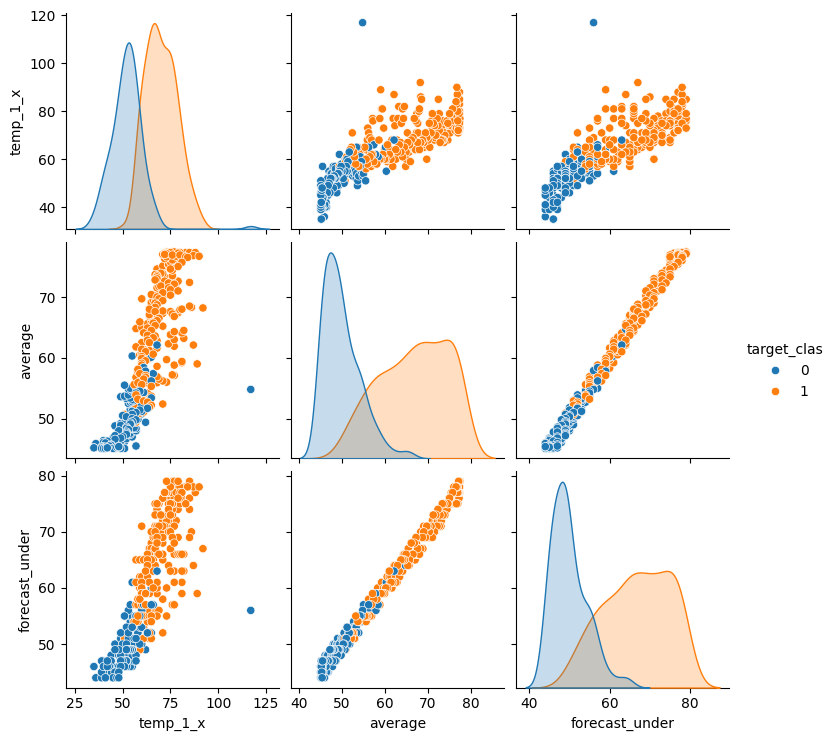

In [134]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [135]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [136]:
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print('lr_accuracy:', lr_accuracy)
print('dtc_accuracy:', accuracy)
print('rfc_accuracy:', rfc_accuracy)

lr_accuracy: 0.8571428571428571
dtc_accuracy: 0.9142857142857143
rfc_accuracy: 0.9142857142857143
